In [1]:
%reload_ext autoreload
%autoreload 2

In [36]:
pip install mysql-connector-python==8.0.29

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

# nuosavų funkcijų importavimas:
from Mano_Funkcijos import *

In [40]:
DB = cnt.connect(
    host='88.223.121.130',
    port=3306,
    user='user',
    password = 'slaptazodis',
    database = 'works'
)
C = DB.cursor()

In [13]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql=""" select count(*) as Kiekis, count(*)/(select count(*) from sa)*100 as `Rinkos dalis`,
case 
when device_brand in (select * from(select brand from
(select count(*) as kiekis, device_brand as brand  from sa where device_brand<>'' group by device_brand) as D
order by kiekis desc limit 5)as f) then device_brand
else 'Other'
end as Brand from sa
group by Brand
order by kiekis desc;"""
C.execute(sql)
ans = C.fetchall()
kiekis, dalis, gamintojai = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

Rodoma 5 eilutės iš 6
| 0 |     36290      |    30.4927     |    Samsung     |
| 1 |     35186      |    29.5651     |     Nokia      |
| 2 |     31091      |    26.1243     |     Other      |
| 3 |      7161      |     6.0170     |   BlackBerry   |
| 4 |      5194      |     4.3643     |       LG       |


In [12]:
pout (ans)

| 0 |       F        |     22366      |2097.37965841008|
| 1 |       M        |     22586      |2633.69374391215|


In [10]:
print (gamintojai)

[36290, 35186, 31091, 7161, 5194, 4090]


In [11]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select lytis, count(*),
avg(bdu_spalio)
from DUS2014N
group by lytis;
"""
C.execute(sql)
ans = C.fetchall()
lytis, kiekis, atlyginimas = list(map(list, zip(*ans)))
#? = np.transpose(ans)

| 0 |     14-29      |      9362      |      9368      |      0.06      |     596.0      |     866.0      |     45.34      |
| 1 |     30-39      |      9747      |      9282      |     -4.77      |     791.0      |     1089.0     |      37.7      |
| 2 |     40-49      |     10947      |      9421      |     -13.94     |     696.0      |     981.0      |      40.9      |
| 3 |     50-59      |     10968      |     10056      |     -8.32      |     663.0      |     856.0      |     29.22      |
| 4 |      60+       |      3928      |      5037      |     28.23      |     623.0      |     785.0      |     25.96      |


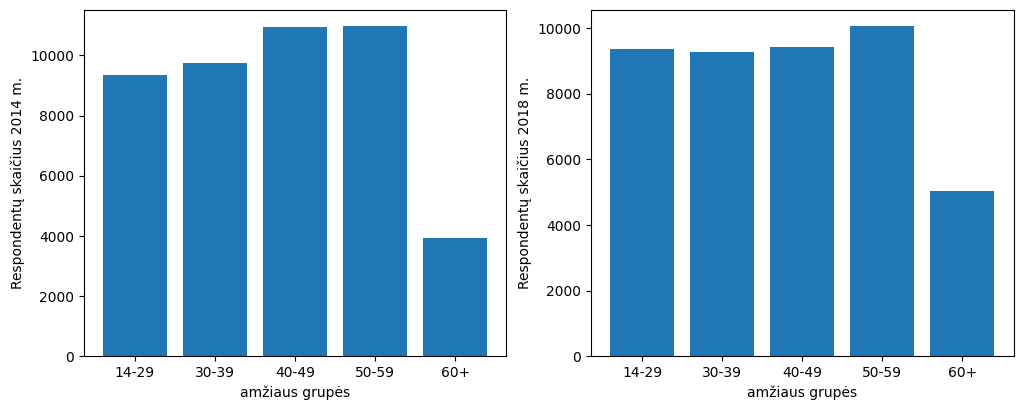

In [10]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""SELECT 
    amzius AS age_group,
    COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END) AS respondent_count_2014,
    COUNT(CASE WHEN metai = 2018 THEN amzius ELSE NULL END) AS respondent_count_2018,
    ROUND(
        (COUNT(CASE WHEN metai = 2018 THEN amzius ELSE NULL END) - COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END)) /
        NULLIF(COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END), 0) * 100, 
        2
    ) AS respondentu_procentinis_pokytis,
    ROUND(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END)/3.475, 0) AS Alga_2014,
    ROUND(AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END), 0) AS Alga_2018,
    ROUND(
        (AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END) - AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END) / 3.475) /
        NULLIF(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END) / 3.475, 0) * 100,
        2
    ) AS algos_procentinis_pokytis
FROM (
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2014 AS metai, 
        bdu_spalio AS alga 
    FROM DUS2014N
    UNION ALL
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2018 AS metai, 
        bdu_spalio AS alga 
    FROM DUS2018N
) AS combined
GROUP BY age_group;"""
C.execute(sql)
ans = C.fetchall()
age_group, respondent_count_2014, respondent_count_2018, respondentu_procentinis_pokytis, alga_2014, alga_2018, algos_procentinis_pokytis = list(map(list, zip(*ans)))
#apsiriboju, kad butu isvesti tik trys stulpeliai
#age_group, respondent_count_2014, respondent_count_2018 = zip(*[(row[0], row[1], row[2]) for row in ans])

#? = np.transpose(ans)
pout(ans)
# Sukurkite subplots su 1 eilute ir 2 stulpeliais
fig, axes = plt.subplots(1,2, figsize=[12, 4.5])

# Pirmasis barų grafikas
axes[0].bar(age_group, respondent_count_2014)
axes[0].set_xlabel('amžiaus grupės')
axes[0].set_ylabel('Respondentų skaičius 2014 m.')

# Antrasis barų grafikas
axes[1].bar(age_group, respondent_count_2018)
axes[1].set_xlabel('amžiaus grupės')
axes[1].set_ylabel('Respondentų skaičius 2018 m.')

# Parodykite grafikus
plt.show()

Text(0, 0.5, 'Moteru alga 2018.')

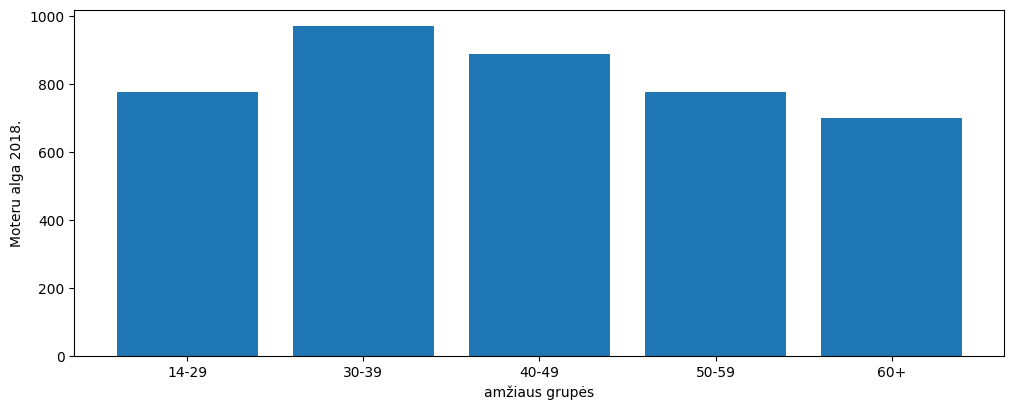

In [18]:
#2018 metams, parodykite vaizdžiai vidutinio atlyginimo priklausomybę 
#nuo amžiaus grupės, atskirai vyrams, atskirai moterims.
#sql užklausos vykdymas per mysql/mariadb kursorių

#Skaiciuoju moteru skaiciu ir ju vidutini atlyginima
sql="""SELECT 
    amzius AS age_group,
    COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END) AS respondent_count_2014,
    COUNT(CASE WHEN metai = 2018 THEN amzius ELSE NULL END) AS respondent_count_2018,
    ROUND(
        (COUNT(CASE WHEN metai = 2018 THEN amzius ELSE NULL END) - COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END)) /
        NULLIF(COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END), 0) * 100, 
        2
    ) AS respondentu_procentinis_pokytis,
    ROUND(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END)/3.475, 0) AS Alga_2014,
    ROUND(AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END), 0) AS Alga_2018,
    ROUND(
        (AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END) - AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END) / 3.475) /
        NULLIF(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END) / 3.475, 0) * 100,
        2
    ) AS algos_procentinis_pokytis
FROM (
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2014 AS metai, 
        bdu_spalio AS alga 
    FROM DUS2014N
    WHERE lytis = 'F'
    UNION ALL
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2018 AS metai, 
        bdu_spalio AS alga 
    FROM DUS2018N
    WHERE lytis = 'F'
) AS combined
GROUP BY age_group"""
C.execute(sql)
ans = C.fetchall()
age_group, respondent_count_2014, respondent_count_2018, respondentu_procentinis_pokytis, alga_2014, alga_2018, algos_procentinis_pokytis = list(map(list, zip(*ans)))
#apsiriboju, kad butu isvesti tik trys stulpeliai
#age_group, respondent_count_2014, respondent_count_2018 = zip(*[(row[0], row[1], row[2]) for row in ans])

#? = np.transpose(ans)
#pout(ans)
# Sukurkite subplots su 1 eilute ir 2 stulpeliais
fig, axes = plt.subplots(figsize=[12, 4.5])

# Pirmasis barų grafikas
axes.bar(age_group, alga_2018)
axes.set_xlabel('amžiaus grupės')
axes.set_ylabel('Moteru alga 2018.')


| 0 |     14-29      |      5282      |      5077      |     -3.88      |     634.0      |     940.0      |     48.18      |
| 1 |     30-39      |      5196      |      5164      |     -0.62      |     873.0      |     1183.0     |     35.53      |
| 2 |     40-49      |      5068      |      4751      |     -6.25      |     801.0      |     1072.0     |     33.88      |
| 3 |     50-59      |      5012      |      4870      |     -2.83      |     750.0      |     939.0      |     25.25      |
| 4 |      60+       |      2028      |      2614      |     28.90      |     697.0      |     861.0      |     23.57      |


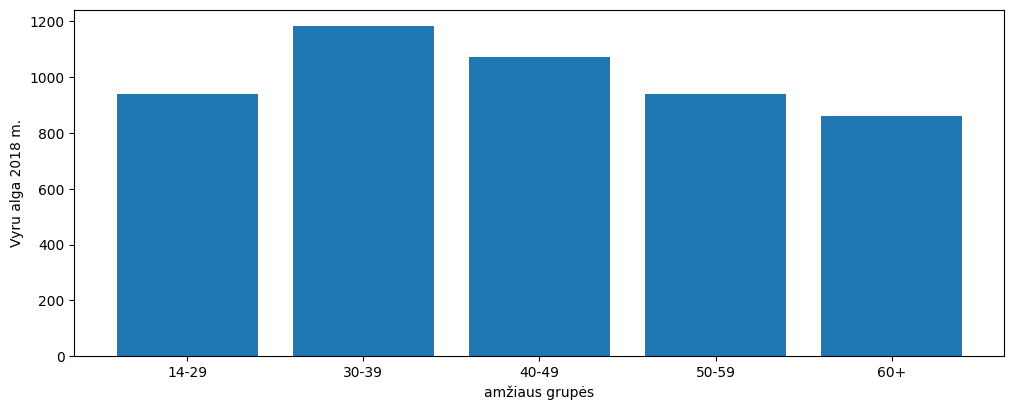

In [19]:
#Skaiciuoju vyru skaiciu ir ju vidutini atlyginima
sql="""SELECT 
    amzius AS age_group,
    COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END) AS respondent_count_2014,
    COUNT(CASE WHEN metai = 2018 THEN amzius ELSE NULL END) AS respondent_count_2018,
    ROUND(
        (COUNT(CASE WHEN metai = 2018 THEN amzius ELSE NULL END) - COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END)) /
        NULLIF(COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END), 0) * 100, 
        2
    ) AS respondentu_procentinis_pokytis,
    ROUND(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END)/3.475, 0) AS Alga_2014,
    ROUND(AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END), 0) AS Alga_2018,
    ROUND(
        (AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END) - AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END) / 3.475) /
        NULLIF(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END) / 3.475, 0) * 100,
        2
    ) AS algos_procentinis_pokytis
FROM (
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2014 AS metai, 
        bdu_spalio AS alga 
    FROM DUS2014N
    WHERE lytis = 'M'
    UNION ALL
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2018 AS metai, 
        bdu_spalio AS alga 
    FROM DUS2018N
    WHERE lytis = 'M'
) AS combined
GROUP BY age_group"""
C.execute(sql)
ans = C.fetchall()
age_group, respondent_count_2014, respondent_count_2018, respondentu_procentinis_pokytis, alga_2014, alga_2018, algos_procentinis_pokytis = list(map(list, zip(*ans)))
#apsiriboju, kad butu isvesti tik trys stulpeliai
#age_group, respondent_count_2014, respondent_count_2018 = zip(*[(row[0], row[1], row[2]) for row in ans])

#? = np.transpose(ans)
pout(ans)
# Sukurkite subplots su 1 eilute ir 2 stulpeliais
fig, axes = plt.subplots(figsize=[12, 4.5])

# Pirmasis barų grafikas
#axes[0].bar(age_group, alga_2018)
#axes[0].set_xlabel('amžiaus grupės')
#axes[0].set_ylabel('Moteru alga 2018 m.')
# Pašalinkite tuščią subplot (4-asis)
#fig.delaxes(axes[0; 0])
# Antrasis barų grafikas
axes.bar(age_group, alga_2018)
axes.set_xlabel('amžiaus grupės')
axes.set_ylabel('Vyru alga 2018 m.')

# Parodykite grafikus
plt.show()

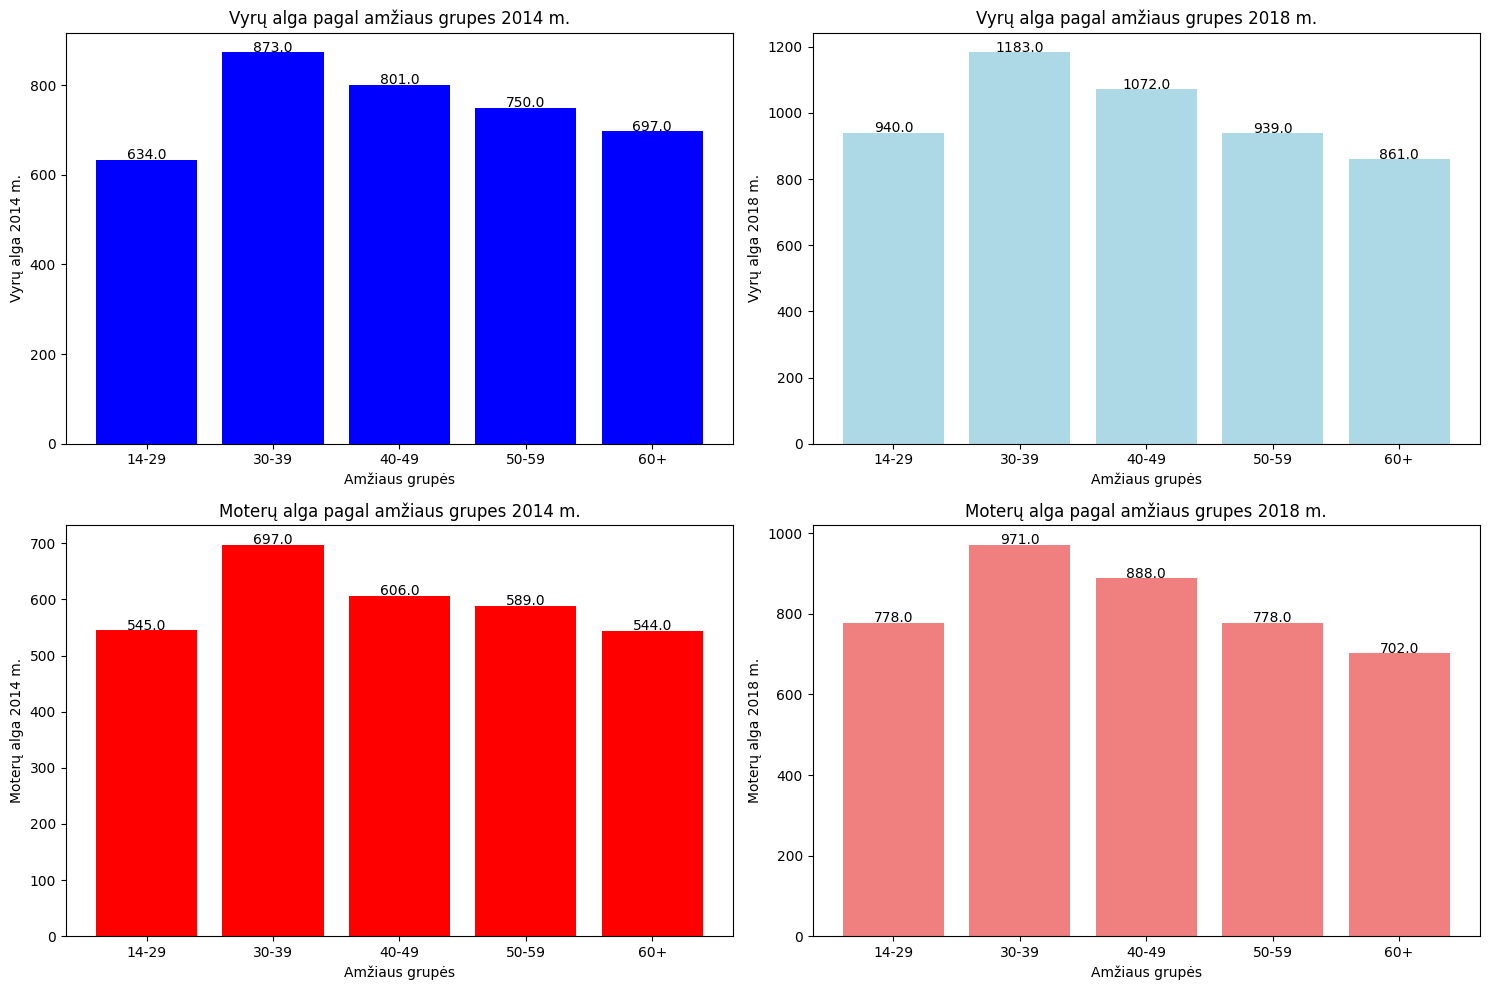

In [7]:
#Skaiciuoju atslkiriu vyrus ir moteris ir ju algas.
sql=""" SELECT 
    amzius AS age_group,
    lytis,
    ROUND(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END)/3.475, 0) AS Alga_2014,
    ROUND(AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END), 0) AS Alga_2018
FROM (
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2014 AS metai, 
        bdu_spalio AS alga,
        lytis
    FROM DUS2014N
    UNION ALL
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2018 AS metai, 
        bdu_spalio AS alga,
        lytis
    FROM DUS2018N
) AS combined
GROUP BY age_group, lytis"""
C.execute(sql)
ans = C.fetchall()

# Paruoškime duomenų struktūras
age_groups = []
vyrai_2014 = []
vyrai_2018 = []
moterys_2014 = []
moterys_2018 = []

# Apdorokime SQL užklausos rezultatus
for row in ans:
    amzius_grupe, lytis, alga_2014, alga_2018 = row
    if amzius_grupe not in age_groups:
        age_groups.append(amzius_grupe)
    
    if lytis == 'M':
        vyrai_2014.append(alga_2014)
        vyrai_2018.append(alga_2018)
    elif lytis == 'F':
        moterys_2014.append(alga_2014)
        moterys_2018.append(alga_2018)

# Sukurkite subplots su 2 eilutėmis ir 2 stulpeliais
fig, axes = plt.subplots(2, 2, figsize=[15, 10])

# Vyrų alga 2014
axes[0, 0].bar(age_groups, vyrai_2014, color='blue')
axes[0, 0].set_xlabel('Amžiaus grupės')
axes[0, 0].set_ylabel('Vyrų alga 2014 m.')
axes[0, 0].set_title('Vyrų alga pagal amžiaus grupes 2014 m.')

# Pridėti stulpelių vertes ant stulpelių
for i, v in enumerate(vyrai_2014):
    axes[0, 0].text(i, v + 1, str(v), ha='center')

# Vyrų alga 2018
axes[0, 1].bar(age_groups, vyrai_2018, color='lightblue')
axes[0, 1].set_xlabel('Amžiaus grupės')
axes[0, 1].set_ylabel('Vyrų alga 2018 m.')
axes[0, 1].set_title('Vyrų alga pagal amžiaus grupes 2018 m.')
# Pridėti stulpelių vertes ant stulpelių
for i, v in enumerate(vyrai_2018):
    axes[0, 1].text(i, v + 1, str(v), ha='center')

# Moterų alga 2014
axes[1, 0].bar(age_groups, moterys_2014, color='red')
axes[1, 0].set_xlabel('Amžiaus grupės')
axes[1, 0].set_ylabel('Moterų alga 2014 m.')
axes[1, 0].set_title('Moterų alga pagal amžiaus grupes 2014 m.')
# Pridėti stulpelių vertes ant stulpelių
for i, v in enumerate(moterys_2014):
    axes[1, 0].text(i, v + 1, str(v), ha='center')

# Moterų alga 2018
axes[1, 1].bar(age_groups, moterys_2018, color='lightcoral')
axes[1, 1].set_xlabel('Amžiaus grupės')
axes[1, 1].set_ylabel('Moterų alga 2018 m.')
axes[1, 1].set_title('Moterų alga pagal amžiaus grupes 2018 m.')
# Pridėti stulpelių vertes ant stulpelių
for i, v in enumerate(moterys_2018):
    axes[1, 1].text(i, v + 1, str(v), ha='center')

# Pritaikyti subplotus
plt.tight_layout()
plt.show()

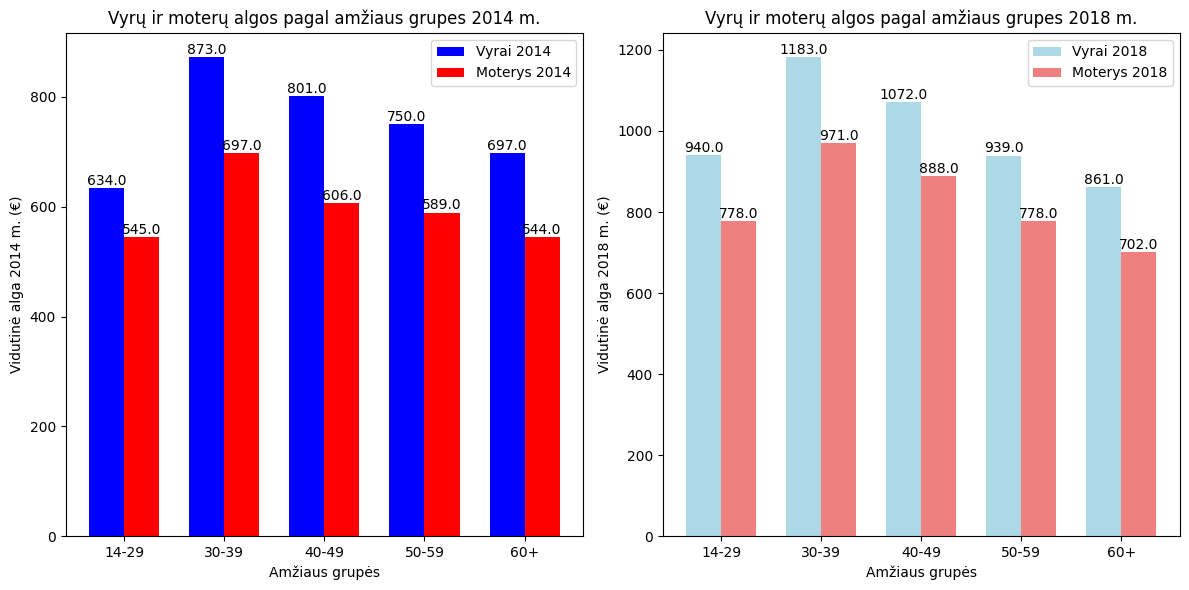

In [18]:
# Vienamegrafike nubreziame 2014 m vyru ir moteru bei 2018 m. vyru ir moteru algu kitimus
import matplotlib.pyplot as plt
import numpy as np

# SQL užklausa (kaip anksčiau nurodyta)
sql = """
SELECT 
    amzius AS age_group,
    lytis,
    ROUND(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END)/3.475, 0) AS Alga_2014,
    ROUND(AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END), 0) AS Alga_2018
FROM (
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2014 AS metai, 
        bdu_spalio AS alga,
        lytis
    FROM DUS2014N
    UNION ALL
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2018 AS metai, 
        bdu_spalio AS alga,
        lytis
    FROM DUS2018N
) AS combined
GROUP BY age_group, lytis"""
C.execute(sql)
ans = C.fetchall()

# Paruoškime duomenų struktūras
age_groups = []
vyrai_2014 = []
vyrai_2018 = []
moterys_2014 = []
moterys_2018 = []

# Apdorojame SQL užklausos rezultatus
for row in ans:
    amzius_grupe, lytis, alga_2014, alga_2018 = row
    if amzius_grupe not in age_groups:
        age_groups.append(amzius_grupe)
    
    if lytis == 'M':
        vyrai_2014.append(alga_2014)
        vyrai_2018.append(alga_2018)
    elif lytis == 'F':
        moterys_2014.append(alga_2014)
        moterys_2018.append(alga_2018)

bar_width = 0.35
index = np.arange(len(age_groups))

# Sukuriame stulpelinį grafiką
fig, ax = plt.subplots(1, 2, figsize=[12, 6])

# Pridedame vyrų ir moterų algas 2014 m.
bars1 = ax[0].bar(index, vyrai_2014, bar_width, label='Vyrai 2014', color='blue')
bars2 = ax[0].bar(index + bar_width, moterys_2014, bar_width, label='Moterys 2014', color='red')

# Pridedame etikečių, ašių ir pavadinimų
ax[0].set_xlabel('Amžiaus grupės')
ax[0].set_ylabel('Vidutinė alga 2014 m. (€)')
ax[0].set_title('Vyrų ir moterų algos pagal amžiaus grupes 2014 m.')
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(age_groups)
ax[0].legend()

# Pridėti stulpelių vertes ant stulpelių
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

# Pridedame vyrų ir moterų algas 2018 m.
bars1 = ax[1].bar(index, vyrai_2018, bar_width, label='Vyrai 2018', color='lightblue')
bars2 = ax[1].bar(index + bar_width, moterys_2018, bar_width, label='Moterys 2018', color='lightcoral')

# Pridedame etikečių, ašių ir pavadinimų
ax[1].set_xlabel('Amžiaus grupės')
ax[1].set_ylabel('Vidutinė alga 2018 m. (€)')
ax[1].set_title('Vyrų ir moterų algos pagal amžiaus grupes 2018 m.')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(age_groups)
ax[1].legend()

# Pridėti stulpelių vertes ant stulpelių
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax[1].text(bar.get_x() + bar.get_width() / 2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

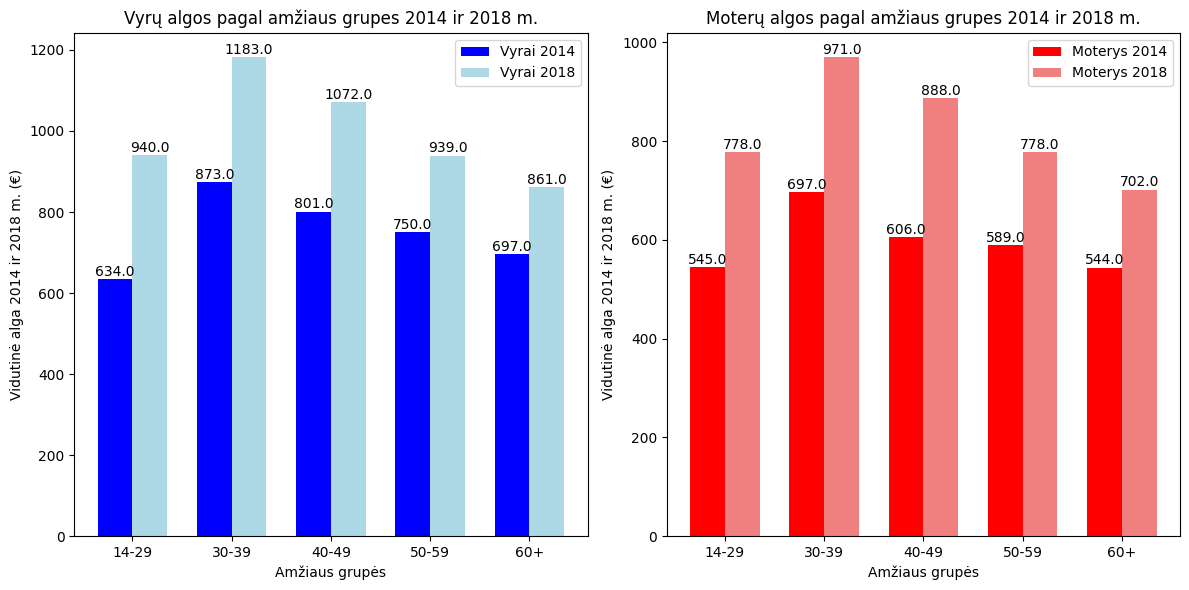

In [20]:
# O dabar moteru algu kitimas 2018 ir 2014 m ir vyru algu kitimas 2018 ir 2014 m
# Vienamegrafike nubreziame 2014 m vyru ir moteru bei 2018 m. vyru ir moteru algu kitimus
import matplotlib.pyplot as plt
import numpy as np

# SQL užklausa (kaip anksčiau nurodyta)
sql = """
SELECT 
    amzius AS age_group,
    lytis,
    ROUND(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END)/3.475, 0) AS Alga_2014,
    ROUND(AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END), 0) AS Alga_2018
FROM (
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2014 AS metai, 
        bdu_spalio AS alga,
        lytis
    FROM DUS2014N
    UNION ALL
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2018 AS metai, 
        bdu_spalio AS alga,
        lytis
    FROM DUS2018N
) AS combined
GROUP BY age_group, lytis"""
C.execute(sql)
ans = C.fetchall()

# Paruoškime duomenų struktūras
age_groups = []
vyrai_2014 = []
vyrai_2018 = []
moterys_2014 = []
moterys_2018 = []

# Apdorojame SQL užklausos rezultatus
for row in ans:
    amzius_grupe, lytis, alga_2014, alga_2018 = row
    if amzius_grupe not in age_groups:
        age_groups.append(amzius_grupe)
    
    if lytis == 'M':
        vyrai_2014.append(alga_2014)
        vyrai_2018.append(alga_2018)
    elif lytis == 'F':
        moterys_2014.append(alga_2014)
        moterys_2018.append(alga_2018)

bar_width = 0.35
index = np.arange(len(age_groups))

# Sukuriame stulpelinį grafiką
fig, ax = plt.subplots(1, 2, figsize=[12, 6])

# Pridedame vyrų algas 2014 m. ir 2018 m.
bars1 = ax[0].bar(index, vyrai_2014, bar_width, label='Vyrai 2014', color='blue')
bars2 = ax[0].bar(index + bar_width, vyrai_2018, bar_width, label='Vyrai 2018', color='lightblue')

# Pridedame etikečių, ašių ir pavadinimų
ax[0].set_xlabel('Amžiaus grupės')
ax[0].set_ylabel('Vidutinė alga 2014 ir 2018 m. (€)')
ax[0].set_title('Vyrų algos pagal amžiaus grupes 2014 ir 2018 m.')
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(age_groups)
ax[0].legend()

# Pridėti stulpelių vertes ant stulpelių
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

# Pridedame moterų algas 2014 m. ir 2018 m.
bars1 = ax[1].bar(index, moterys_2014, bar_width, label='Moterys 2014', color='red')
bars2 = ax[1].bar(index + bar_width, moterys_2018, bar_width, label='Moterys 2018', color='lightcoral')

# Pridedame etikečių, ašių ir pavadinimų
ax[1].set_xlabel('Amžiaus grupės')
ax[1].set_ylabel('Vidutinė alga 2014 ir 2018 m. (€)')
ax[1].set_title('Moterų algos pagal amžiaus grupes 2014 ir 2018 m.')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(age_groups)
ax[1].legend()

# Pridėti stulpelių vertes ant stulpelių
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax[1].text(bar.get_x() + bar.get_width() / 2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

| 0 |      Audi      |   241375.73    |    8447.67     |     16.77      |
| 1 |      BMW       |   260654.43    |    10652.14    |     15.22      |
| 2 | Mercedes-Benz  |   261259.21    |    15080.28    |     15.19      |
| 3 |     Toyota     |   201755.30    |    8712.73     |     14.60      |
| 4 |   Volkswagen   |   237650.65    |    6190.71     |     15.79      |


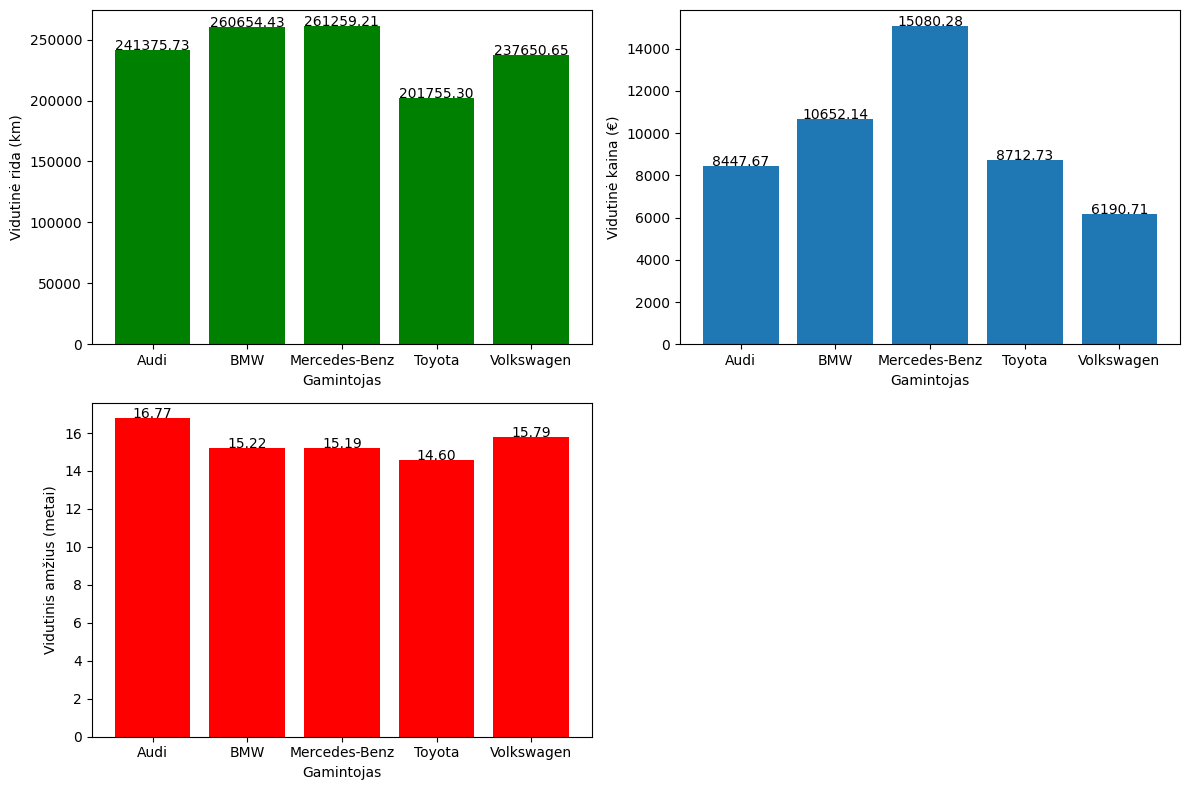

In [15]:
# Raskite 5-kis populiariausius autopliuslt skelbimuose  
# esančius gamintojus, suraskite, kokia buvo kiekvienam  
# iš šių gamintojų automobilių vidutinė kaina, rida,  
# automobilių amžius. (viena kompleksinė SQL užklausa)
# vizualizuokite šią informaciją stulpeline ar kitokia diagrama

import matplotlib.pyplot as plt

# SQL užklausa
sql = """
SELECT 
    t5.gamintojas,
    ROUND(AVG(CAST(REPLACE(ap.rida, ' ', '') AS DECIMAL)), 2) AS vidutine_rida_km,
    ROUND(AVG(CAST(REPLACE(ap.price, ' ', '') AS DECIMAL)), 2) AS vidutine_kaina_Eur,
    ROUND(AVG(2024 - CAST(LEFT(ap.pagaminimo_data, 4) AS INT)), 2) AS vidutinis_amzius_metais
FROM 
    (SELECT 
        gamintojas, 
        COUNT(*) AS skelbimu_skaicius
     FROM 
        autopliuslt
     GROUP BY 
        gamintojas
     ORDER BY 
        skelbimu_skaicius DESC
     LIMIT 5) AS t5
JOIN 
    autopliuslt ap ON t5.gamintojas = ap.gamintojas
GROUP BY 
    t5.gamintojas;
"""
C.execute(sql)
ans = C.fetchall()

# Išpakavimas
gamintojas, vidutine_rida_km, vidutine_kaina_Eur, vidutinis_amzius_metais = list(map(list, zip(*ans)))

pout(ans)
# Vizualizavimas
fig, axes = plt.subplots(2, 2, figsize=[12, 8])

# Pirmasis barų grafikas
axes[0, 0].bar(gamintojas, vidutine_rida_km, color='green')
axes[0, 0].set_xlabel('Gamintojas')
axes[0, 0].set_ylabel('Vidutinė rida (km)')

# Pridėti stulpelių vertes ant stulpelių
for i, v in enumerate(vidutine_rida_km):
    axes[0, 0].text(i, v + 1, str(v), ha='center')

# Antrasis barų grafikas
axes[0, 1].bar(gamintojas, vidutine_kaina_Eur)
axes[0, 1].set_xlabel('Gamintojas')
axes[0, 1].set_ylabel('Vidutinė kaina (€)')
# Pridėti stulpelių vertes ant stulpelių
for i, v in enumerate(vidutine_kaina_Eur):
    axes[0, 1].text(i, v + 1, str(v), ha='center')

# Trečiasis barų grafikas
axes[1, 0].bar(gamintojas, vidutinis_amzius_metais, color='red')
axes[1, 0].set_xlabel('Gamintojas')
axes[1, 0].set_ylabel('Vidutinis amžius (metai)')
# Pridėti stulpelių vertes ant stulpelių
for i, v in enumerate(vidutinis_amzius_metais):
    axes[1, 0].text(i, v, str(v), ha='center')

# Pašalinkite tuščią subplot (4-asis)
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

| 0 |      Audi      |   252499.04    |    8786.73     |     16.35      |
| 1 |      BMW       |   263542.57    |    10720.86    |     15.20      |
| 2 | Mercedes-Benz  |   265763.68    |    15295.47    |     15.11      |
| 3 |     Toyota     |   211362.69    |    8582.15     |     14.53      |
| 4 |   Volkswagen   |   246393.66    |    6358.27     |     15.59      |


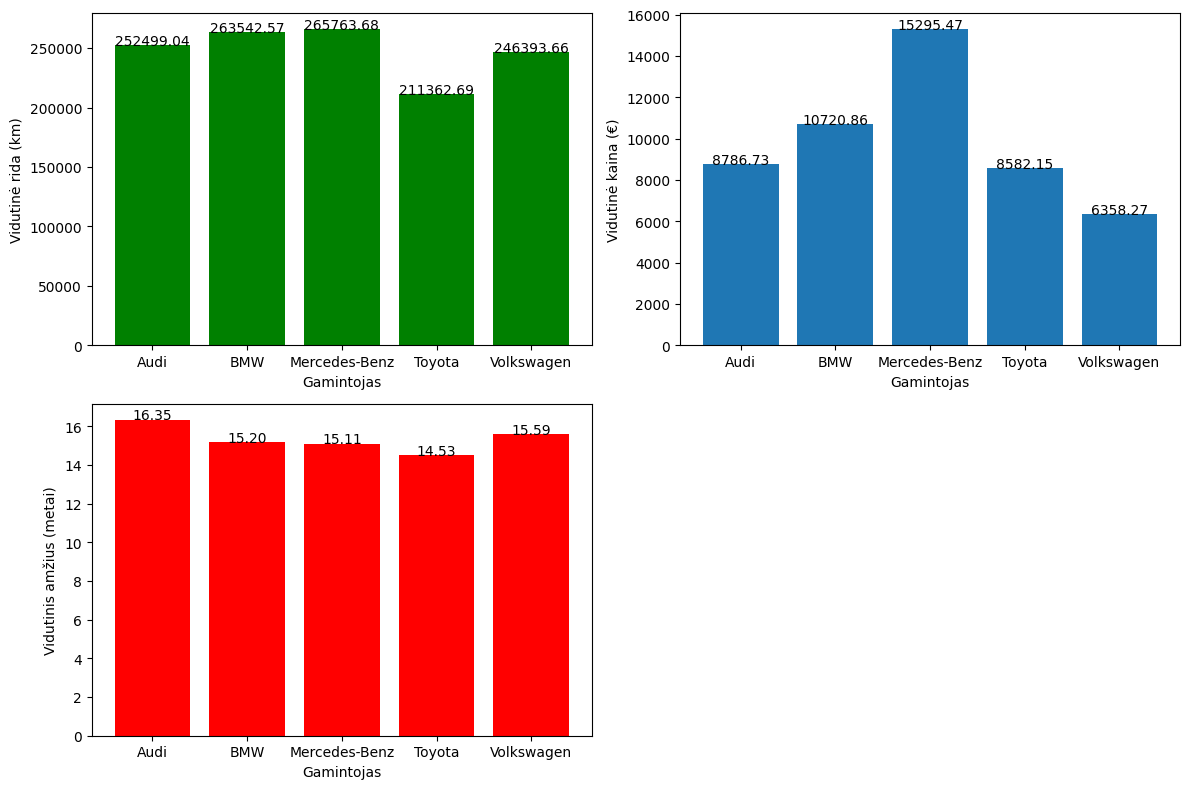

In [16]:
# Raskite 5-kis populiariausius autopliuslt skelbimuose  
# esančius gamintojus, suraskite, kokia buvo kiekvienam  
# iš šių gamintojų automobilių vidutinė kaina, rida,  
# automobilių amžius. (viena kompleksinė SQL užklausa)
# vizualizuokite šią informaciją stulpeline ar kitokia diagrama
# Atmesti tie duomenys, kai rida nera nurodyta

import matplotlib.pyplot as plt

# SQL užklausa
sql = """
SELECT 
    t5.gamintojas,
    ROUND(AVG(CAST(REPLACE(ap.rida, ' ', '') AS DECIMAL)), 2) AS vidutine_rida_km,
    ROUND(AVG(CAST(REPLACE(ap.price, ' ', '') AS DECIMAL)), 2) AS vidutine_kaina_Eur,
    ROUND(AVG(2024 - CAST(LEFT(ap.pagaminimo_data, 4) AS INT)), 2) AS vidutinis_amzius_metais
FROM 
    (SELECT 
        gamintojas, 
        COUNT(*) AS skelbimu_skaicius
     FROM 
        autopliuslt
     GROUP BY 
        gamintojas
     ORDER BY 
        skelbimu_skaicius DESC
     LIMIT 5) AS t5
JOIN 
    autopliuslt ap ON t5.gamintojas = ap.gamintojas
    WHERE 
    TRIM(ap.rida) <> 'nenurodyta' 
GROUP BY 
    t5.gamintojas;
"""
C.execute(sql)
ans = C.fetchall()

# Išpakavimas
gamintojas, vidutine_rida_km, vidutine_kaina_Eur, vidutinis_amzius_metais = list(map(list, zip(*ans)))

pout(ans)
# Vizualizavimas
fig, axes = plt.subplots(2, 2, figsize=[12, 8])

# Pirmasis barų grafikas
axes[0, 0].bar(gamintojas, vidutine_rida_km, color='green')
axes[0, 0].set_xlabel('Gamintojas')
axes[0, 0].set_ylabel('Vidutinė rida (km)')

# Pridėti stulpelių vertes ant stulpelių
for i, v in enumerate(vidutine_rida_km):
    axes[0, 0].text(i, v + 1, str(v), ha='center')

# Antrasis barų grafikas
axes[0, 1].bar(gamintojas, vidutine_kaina_Eur)
axes[0, 1].set_xlabel('Gamintojas')
axes[0, 1].set_ylabel('Vidutinė kaina (€)')
# Pridėti stulpelių vertes ant stulpelių
for i, v in enumerate(vidutine_kaina_Eur):
    axes[0, 1].text(i, v + 1, str(v), ha='center')

# Trečiasis barų grafikas
axes[1, 0].bar(gamintojas, vidutinis_amzius_metais, color='red')
axes[1, 0].set_xlabel('Gamintojas')
axes[1, 0].set_ylabel('Vidutinis amžius (metai)')
# Pridėti stulpelių vertes ant stulpelių
for i, v in enumerate(vidutinis_amzius_metais):
    axes[1, 0].text(i, v, str(v), ha='center')

# Pašalinkite tuščią subplot (4-asis)
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

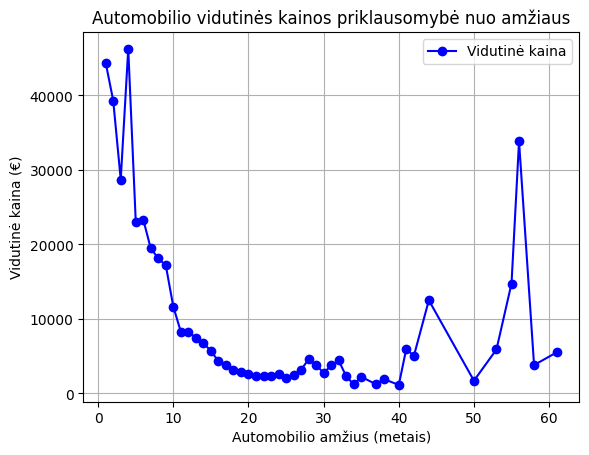

In [61]:
# Sugrupuokite automobilius pagal jų amžių, ir suraskite
# vidutinę kainą kiekvienam amžiui.Ar didėjant automobilių amžiui, jų kaina yra linkusi mažėti? -(NE. Pradeda dideti)
# -- Pateikite vizualizaciją, atsakančią į pateiktą klausimą.-
sql="""SELECT 
    ROUND(2024 - CAST(LEFT(pagaminimo_data, 4) AS INT), 2) AS amzius_metais,
    ROUND(AVG(CAST(REPLACE(price, ' ', '') AS DECIMAL)), 2) AS vidutine_kaina_Eur
FROM 
    autopliuslt
GROUP BY 
    amzius_metais
ORDER BY 
    amzius_metais DESC;"""
C.execute(sql)
ans = C.fetchall()
amzius, vidutine_kaina_Eur = list(map(list, zip(*ans)))

#? = np.transpose(ans)
#pout(ans)
# Sukurkite subplots su 1 eilute ir 2 stulpeliais

plt.plot(amzius, vidutine_kaina_Eur,marker='o', linestyle='-', color='b', label='Vidutinė kaina')

# Pridėkite grafiko elementus
plt.xlabel('Automobilio amžius (metais)')
plt.ylabel('Vidutinė kaina (€)')
plt.title('Automobilio vidutinės kainos priklausomybė nuo amžiaus')
plt.legend()

# Parodykite grafiką
plt.grid(True)
plt.show()

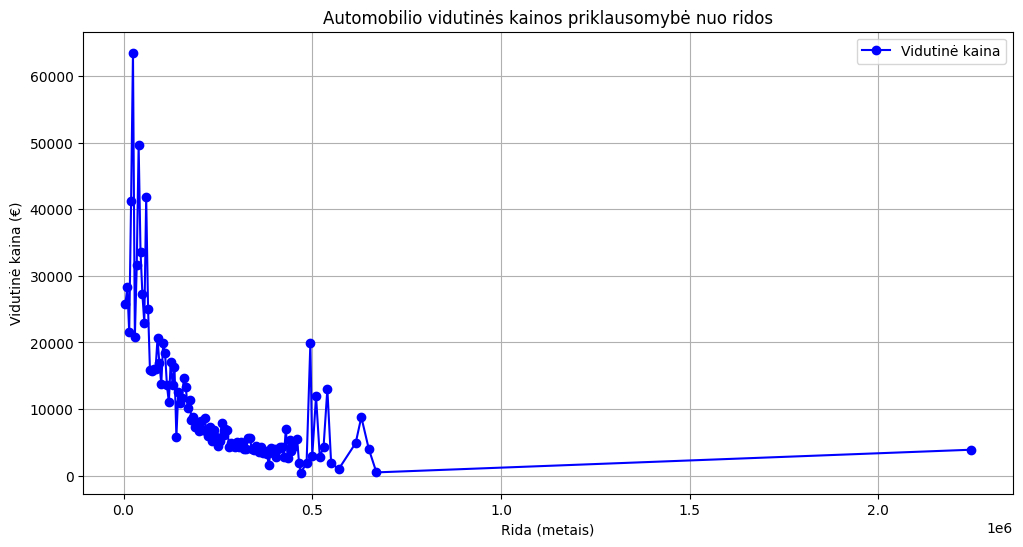

In [65]:
# Sugrupuokite automobilius pagal ridą, intervalais kas 5000 km, ir suraskite vidutinę kainą
# kiekviename intervale. 
# Ar didėjant ridai, automobilių kaina yra linkusi mažėti?
# Pateikite vizualizaciją, atsakančią į pateiktą klausimą.50

sql="""SELECT 
    CEIL(CAST(REPLACE(REPLACE(rida, ' ', ''), 'km', '') AS DECIMAL) / 5000) * 5000 AS rida_intervalas,
    ROUND(AVG(CAST(REPLACE(ap.price, ' ', '') AS DECIMAL)), 2) AS vidutine_kaina_Eur
FROM 
    autopliuslt ap
WHERE 
    rida <> 'nenurodyta'
GROUP BY 
    rida_intervalas
ORDER BY 
    rida_intervalas;
"""
C.execute(sql)
ans = C.fetchall()
rida_intervalas, vidutine_kaina_Eur = list(map(list, zip(*ans)))

#? = np.transpose(ans)
#pout(ans)
# Sukurkite subplots su 1 eilute ir 2 stulpeliais
fig, ax = plt.subplots(figsize=(12, 6)) 
plt.plot(rida_intervalas, vidutine_kaina_Eur,marker='o', linestyle='-', color='b', label='Vidutinė kaina')

# Pridėkite grafiko elementus
plt.xlabel('Rida (metais)')
plt.ylabel('Vidutinė kaina (€)')
plt.title('Automobilio vidutinės kainos priklausomybė nuo ridos')
plt.legend()

# Parodykite grafiką
plt.grid(True)
plt.show()

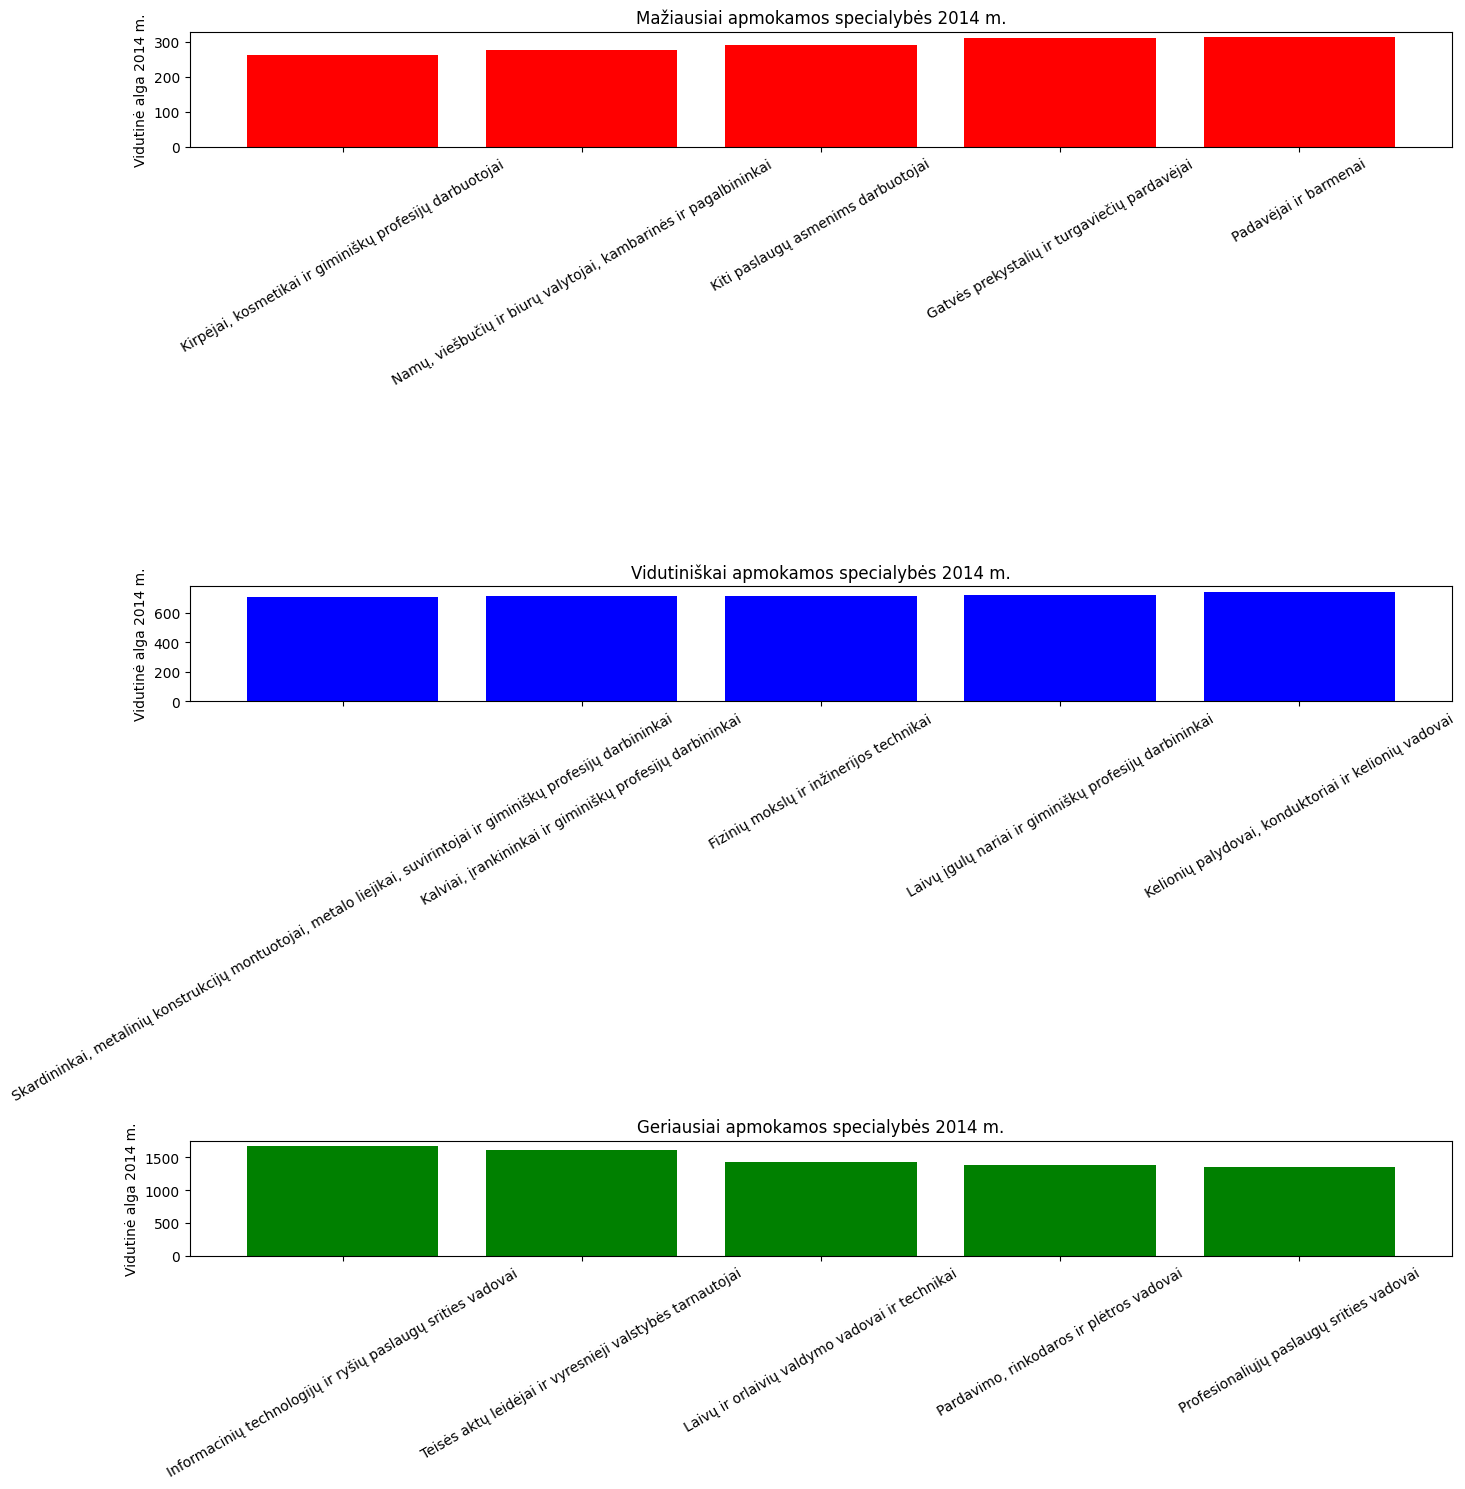

In [33]:
# Raskite 5 mažiausiai apmokamas specialybes 2014 metais, atvaizduokite jų vidutinį atlyginimą su bar arba barh.
# Raskite 5 vidutiniškai apmokamas specialybes (0.9-1.1 VDU, imate arčiausiai 1.1 VDU esančias), atvaizduojate vidutinius atlyginimas su bar arba barh.
sql = """
SELECT 
    profesijos.kodas,
    profesijos.profesija,
    AVG(TOP5_2014.vidutine_alga) AS vidutine_alga_2014,
    TOP5_2014.kategorija
FROM 
    profesijos
JOIN 
    TOP5_2014
ON 
    profesijos.kodas = TOP5_2014.profesija
GROUP BY 
    profesijos.kodas, profesijos.profesija, TOP5_2014.kategorija
"""
C.execute(sql)
ans = C.fetchall()

# Paruoškime duomenų struktūras pagal kategorijas
maziausiai_apmokamos = []
vidutiniskai_apmokamos = []
geriausiai_apmokamos = []

# Apdorokime SQL užklausos rezultatus
for row in ans:
    kodas, profesija, vidutine_alga, kategorija = row
    if kategorija == "Maziau nei vidutiniskai apmokamas":
        maziausiai_apmokamos.append((profesija, round(vidutine_alga, 2)))
    elif kategorija == "Vidutiniskai apmokamas":
        vidutiniskai_apmokamos.append((profesija, round(vidutine_alga, 2)))
    elif kategorija == "Geriausiai apmokamas":
        geriausiai_apmokamos.append((profesija, round(vidutine_alga, 2)))

# Sukurkite subplots su 3 eilutėmis ir 1 stulpeliu
fig, axes = plt.subplots(3, 1, figsize=[15, 15])

# Mažiausiai apmokamos specialybės
profesijos_maziausiai, algos_maziausiai = zip(*sorted(maziausiai_apmokamos, key=lambda x: x[1])[:5])
axes[0].bar(profesijos_maziausiai, algos_maziausiai, color='red')
axes[0].set_ylabel('Vidutinė alga 2014 m.')
axes[0].set_title('Mažiausiai apmokamos specialybės 2014 m.')
axes[0].tick_params(axis='x', rotation=30)

# Vidutiniškai apmokamos specialybės
profesijos_vidutiniskai, algos_vidutiniskai = zip(*sorted(vidutiniskai_apmokamos, key=lambda x: abs(x[1] - 1.1 * sum(algos_maziausiai)/len(algos_maziausiai)))[:5])
axes[1].bar(profesijos_vidutiniskai, algos_vidutiniskai, color='blue')
axes[1].set_ylabel('Vidutinė alga 2014 m.')
axes[1].set_title('Vidutiniškai apmokamos specialybės 2014 m.')
axes[1].tick_params(axis='x', rotation=30)

# Geriausiai apmokamos specialybės
profesijos_geriausiai, algos_geriausiai = zip(*sorted(geriausiai_apmokamos, key=lambda x: x[1], reverse=True)[:5])
axes[2].bar(profesijos_geriausiai, algos_geriausiai, color='green')
axes[2].set_ylabel('Vidutinė alga 2014 m.')
axes[2].set_title('Geriausiai apmokamos specialybės 2014 m.')
axes[2].tick_params(axis='x', rotation=30)

# Pritaikyti subplotus
plt.tight_layout()
plt.show()

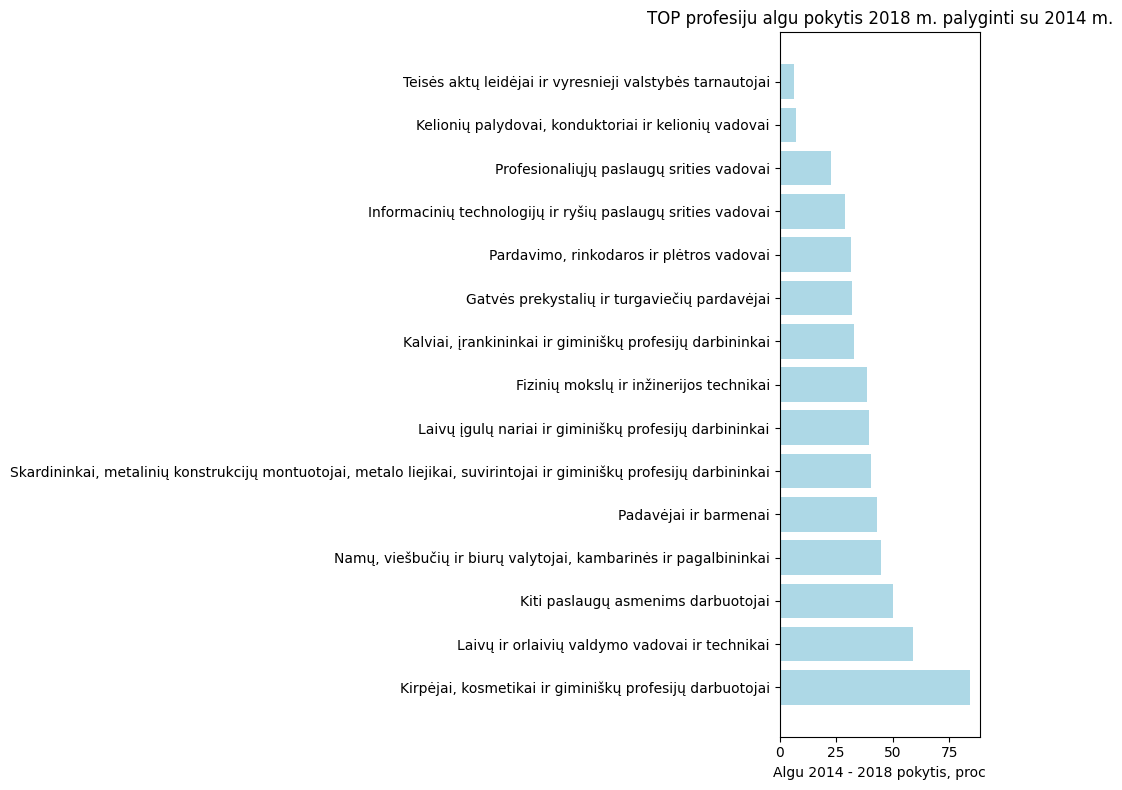

In [45]:
# Braizome, kaip pakito algos atrinktom specialybem lyginant su 2014
sql = """
     SELECT 
    t2014.kodas,
    t2014.profesija,
    t2014.vidutine_alga AS vidutine_alga_2014,
    t2018.vidutine_alga AS vidutine_alga_2018,
    ROUND((t2018.vidutine_alga - t2014.vidutine_alga)/t2014.vidutine_alga*100,2) AS alga_skirtumas_proc
FROM 
    TOP5_2014N t2014
JOIN 
    TOP5_2018 t2018 ON t2014.kodas = t2018.profesija
    GROUP BY
    alga_skirtumas_proc Desc;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų paruošimas grafikui
profesijos = [row[1] for row in ans]
alga_skirtumas_proc = [row[4] for row in ans]

# Braizom grafika
plt.figure(figsize=(10, 8))
plt.barh(profesijos, alga_skirtumas_proc, color='lightblue')
plt.xlabel('Algu 2014 - 2018 pokytis, proc')
plt.title('TOP profesiju algu pokytis 2018 m. palyginti su 2014 m.')

# Pritaikyti subplotus
plt.tight_layout()
plt.show()